In [6]:
import random


class Person(object):

    def __init__(self, default_days_sick=5, default_infection_rate=10):
        self.ID=0
        self.age= 0
        self.status='Susceptible'
        self.days_sick=0
        self.max_days_sick=default_days_sick
        self.infection_rate=default_infection_rate
        self.interactions=[]
        
    def set_infection_rate(self, new_rate):
        self.infection_rate = new_rate
    
    def infect(self, number_of_days):
        self.status = "Infected"
        self.days_sick = number_of_days
    
    def recover(self):
        self.status = "Recovered"
        self.days_sick = 0
        
    def roll_for_infection(self):
        if(random.randint(0,101) < self.infection_rate):
            self.infect(self.max_days_sick)      
    
    def get_status(self):
        return self.status
    
    def get_days_sick(self):
        return self.days_sick
    
    def get_age(self):
        return self.age
    
    def set_max_days_sick(self, new_days):
        self.max_days_sick = new_days
    
    
    def update(self):
        if (self.status == "Susceptible"):
            self.roll_for_infection()
            
        elif (self.status == "Infected"):            
            self.days_sick = self.days_sick - 1
            if (self.days_sick <= 0):
                self.recover()
    

In [7]:
day = 0
Joe = Person()
Jane = Person()

while (Joe.get_status() != "Recovered"):
    day = day + 1
    Joe.update()
    
    
    if (Joe.get_status() == "Infected" or Jane.get_status() =="Infected"):
        Jane.update()
    
    if (Joe.get_status()=='Recovered' and Jane.get_status()=="Susceptible"):
        Joe = Person()
        print("------Reset---------")
        
    #print ("Day: ", day)
    #print ("Joe is currently: ", Joe.get_status(), ", Joe will be sick for ", Joe.get_days_sick(), " days")    
    #print ("Jane is currently: ", Jane.get_status(), ", Joe will be sick for ", Jane.get_days_sick(), " days")      

In [12]:
class Population(object):
    def __init__(self, number_of_people=1000, default_interactions=10, default_days_sick=5, default_infection_rate=10):
        self.People = []
        self.population_count = number_of_people
        self.number_of_interactions = default_interactions
        self.max_days_sick = default_days_sick
        self.infection_rate = default_infection_rate
        self.countC = 0
        self.countK=0
        self.countY = 0
        self.countO = 0
        self.infectados=0
        
        self.recover1 = 0
        self.recover2=0
        self.recover3 = 0
        self.recover4 = 0
        
        
        ## set Patient_Zero aka The Jerk
        patient_zero = Person()
        patient_zero.infect(self.max_days_sick)
        
        ## add patient_zero to our People[]
        
        self.People.append(patient_zero)
        
        ## build the rest of our Population      
        for i in range(0, self.population_count):
            new_person = Person()
            self.People.append(new_person)
    
    ##go through our population, and count each person that's susceptible
    def number_of_susceptible(self):
        count = 0
        
        for the_person in self.People:
            if (the_person.get_status() == "Susceptible"):
                count = count + 1
        
        return count
    
    ##go through the population, and count each person that's infected
   
    
    def number_of_infected(self):
        count = 0
        
        for the_person in self.People:
            if (the_person.get_status() == "Infected"):
                count = count + 1
        
        return count
    
    
    
    ##go through the population, and count each person that's recovered
    def number_of_recovered(self):
        count = 0
        
        for the_person in self.People:
            if (the_person.get_status() == "Recovered"):
                count = count + 1
                
        return count
    
    ##Total Population
    def get_population_count(self):
        return self.People.count()
    
    
    def update(self):
        
        ##we're going to make a list of People who might get
        ##infected at the end of the day
        
        might_get_sick = []
        
        ## go through my Population and see who might get sick
        for person in self.People:
            person.interactions = []
            
            ## each person inteteracts w/ number_of_interaction number of people
            
            for i in range(0, self.number_of_interactions):
                r = random.randint(0, self.population_count)
                person.interactions.append(r)
            
            ## if person is infected, their interactions might get infected
            if (person.get_status() == "Infected"):
                ##????? really????
                person.update()
                
                for j in person.interactions:
                    if (self.People[j].get_status() == "Susceptible" and random.randint(0,10) % 2 != 0):
                        person.set_infection_rate(3)
                        might_get_sick.append(self.People[j])
                        #print("mascarilla: ", len(might_get_sick))
                        
                    elif (self.People[j].get_status() == "Susceptible"):  
                        might_get_sick.append(self.People[j])
                        #print("sin mascarilla: ", len(might_get_sick))
            
            ## if person is susceptible, they interact w/ someone infected
            if (person.get_status() == "Susceptible"):
                for j in person.interactions:
                    if (self.People[j].get_status() == "Infected"):
                        might_get_sick.append(person)
                        
        ##the above updates each person who is infected
        ##I have a list of people who **might** get infected
        ##each person in that list, has to roll to get infected
        
        for person in might_get_sick:
            person.roll_for_infection()
    
    
     
    
    
    def infectedChilds(self):
        day=0
        prueba=0
        for the_person in self.People:
            age=random.randint(0,80)
            
             
            if (the_person.get_status() == "Infected" and age<=5):
                self.countC = self.countC + 1
                the_person.set_infection_rate(15)
                
                
            if (the_person.get_status() == "Infected" and 5<age<=18):
                self.countK = self.countK + 1
                the_person.set_infection_rate(10)
                
                
            if (the_person.get_status() == "Infected" and 18<age<=65):
                self.countY = self.countY + 1
                the_person.set_infection_rate(20)
                
                
            if (the_person.get_status() == "Infected" and 65<age):
                self.countO = self.countO + 1
                the_person.set_infection_rate(40)
                the_person.set_max_days_sick(10)
                
        
        
        print("There is a total of infected of",self.countC,"Babies",self.countK,"Childs",self.countY,"Adults",self.countO,"Elders")
        print("----------------------------------------------------------------------------")
        print("\n")
        self.infectados=self.countO+self.countY+self.countC+self.countK
        return self.infectados
    
 
    
    def show(self):
       
        print("Total infected: ","[",self.infectados,"]")
        print("------------------------------------------")
              
        
      
            
                

-----------------------
-In the day number: 1 -
-----------------------
There is a total of infected of 0 Babies 0 Childs 0 Adults 1 Elders
----------------------------------------------------------------------------


-----------------------
-In the day number: 2 -
-----------------------
There is a total of infected of 0 Babies 0 Childs 2 Adults 1 Elders
----------------------------------------------------------------------------


-----------------------
-In the day number: 3 -
-----------------------
There is a total of infected of 2 Babies 0 Childs 5 Adults 2 Elders
----------------------------------------------------------------------------


-----------------------
-In the day number: 4 -
-----------------------
There is a total of infected of 2 Babies 1 Childs 17 Adults 5 Elders
----------------------------------------------------------------------------


-----------------------
-In the day number: 5 -
-----------------------
There is a total of infected of 5 Babies 9 Childs 4

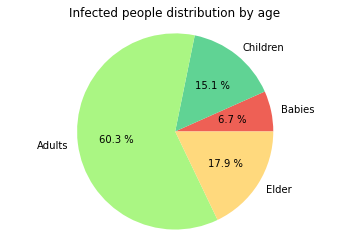

In [13]:
myCommunity=Population(1000)
day=0
number_infected=myCommunity.number_of_infected()
while(number_infected>0):
    number_infected=myCommunity.number_of_infected()
    number_recovered=myCommunity.number_of_recovered()
    #print("day",day,"infected ", number_infected, "recovered: ", number_recovered)
    
    day=day+1
    print("-----------------------")
    print("-In the day number:", day,"-")
    print("-----------------------")
    myCommunity.update()  
    myCommunity.infectedChilds()
    
   
    
import matplotlib.pyplot as plt
myCommunity.show() 
plt.title('Infected people distribution by age')
numeros = [myCommunity.countC,myCommunity.countK,myCommunity.countY,myCommunity.countO]
poblacion = ["Babies","Children","Adults","Elder"]
colores = ["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85"]
plt.pie(numeros, labels=poblacion, autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.show()
